In [1]:
# if open from google colab, run this command
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Github/sales-prediction-gru/ipynb
# %cd /content/drive/Shareddrives/BUAT\ DIEGO/Data-retail-2015-2022-keluar/
%cd /content/drive/MyDrive/data-retail

Mounted at /content/drive
/content/drive/MyDrive/data-retail


In [2]:
import os, warnings, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model

import joblib
from keras.models import load_model

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Set seeds to make the experiment more reproducible.
def seed_everything(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed = 0
seed_everything(seed)
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 2017-2021

In [3]:
# df2016 = pd.read_csv('./data-2016-renew.csv', parse_dates=['tgl'])
df2017 = pd.read_csv('./data-2017-renew.csv', parse_dates=['tgl'])
df2018 = pd.read_csv('./data-2018-renew.csv', parse_dates=['tgl'])
df2019 = pd.read_csv('./data-2019-renew.csv', parse_dates=['tgl'])
df2020 = pd.read_csv('./data-2020-renew.csv', parse_dates=['tgl'])
df2021 = pd.read_csv('./data-2021-renew.csv', parse_dates=['tgl'])
df2022 = pd.read_csv('./data-2022-renew.csv', parse_dates=['tgl'])

In [4]:
# print("kodekategori 2016: ", df2016['kodekategori'].unique())
# print("kategori 2016: ", df2016['kategori'].unique())
# print("2017: ", df2017['kategori'].unique())
# print("2018: ", df2018['kategori'].unique())
# print("2019: ", df2019['kategori'].unique())
# print("2020: ", df2020['kategori'].unique())

In [5]:
# get unique kategori value

# group_kategori2016 = df2016.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2017 = df2017.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2018 = df2018.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2019 = df2019.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2020 = df2020.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2021 = df2021.groupby('kodekategori')['kategori'].unique().reset_index()

# pdList = [group_kategori2016, group_kategori2017, group_kategori2018, group_kategori2019, group_kategori2020, group_kategori2021]
pdList = [group_kategori2017, group_kategori2018, group_kategori2019, group_kategori2020, group_kategori2021]

new_kategori = pd.concat(pdList).reset_index(drop=True)
new_kategori['kodekategori'] = new_kategori['kodekategori'].astype(float)
new_kategori['kategori'] = new_kategori['kategori'].astype(str)

clean_kategori = new_kategori.drop_duplicates(subset=['kodekategori']).reset_index(drop=True)

In [6]:
display(clean_kategori.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115
kodekategori,101.00,102.00,103.00,104.00,105.00,106.00,107.00,108.00,109.00,110.00,111.00,112.00,113.00,114.00,115.00,201.00,202.00,203.00,204.00,205.00,206.00,301.00,302.00,10101.00,10102.00,10103.00,10104.00,10105.00,10106.00,10107.00,10108.00,10109.00,10110.00,10111.00,10112.00,10113.00,10114.00,10115.00,10116.00,10117.00,10118.00,10119.00,10120.00,10121.00,10201.00,10202.00,10203.00,10204.00,10205.00,10206.00,10207.00,10208.00,10209.00,10210.00,10211.00,10212.00,10213.00,20101.00,20201.00,20402.00,20501.00,20502.00,20503.00,20504.00,20601.00,30101.00,30201.00,30202.00,30203.00,30204.00,30301.00,30302.00,30303.00,30304.00,30305.00,30306.00,30307.00,30308.00,30309.00,30310.00,30311.00,30312.00,30401.00,30402.00,30403.00,30404.00,30405.00,30406.00,30407.00,40101.00,40103.00,40201.00,40202.00,40203.00,40301.00,40302.00,40303.00,40304.00,40305.00,40306.00,40307.00,40308.00,40309.00,40312.00,40401.00,40402.00,40403.00,40404.00,40405.00,20301.00,40310.00,40311.00,40501.00,40601.00,20302.00,40502.00
kategori,['Baby Needs'],['Mens Care (2)'],['Healt & Beauty Care (3)'],['Kids Care (4)'],['Cleaning (5)'],['Homes (6)'],['Electronic & Tool kits (7)'],['Automotive (8)'],['Stationery (9)'],['Toys (10)'],['Sports (11)'],['Event Equipment (12)'],['Convection (13)'],['Shoes & Sandals (14)'],['Bag & Luggage (15)'],['Food (1)'],['Beverage (2)'],['Medicine (3)'],['Pets food (4)'],['Cigarette (5)'],['Fresh Food (6)'],['Others (1)'],['alisha collection'],['Makanan Bayi (Baby Food)'],['Bahan Kue (Baking Supplies)'],['Biskuit (Biscuit)'],['Roti dan Kue (Bread & Cake)'],['Sarapan Pagi (Breakfast)'],['Penganan Permen (Candy Confectionary)'],['Penganan Coklat (Chocolate Confectionary)'],['Makanan Mentah (Raw Food)'],['Ice'],['Makanan Masak (Cooked Food)'],['Bumbu Dapur (Seasoning)'],['Mie (Noodle)'],['Pasta'],['Makanan Ringan (Snack)'],['Beras (Rice)'],['Biji-bijian (Seeds)'],['Gula (Sugar)'],['Tepung (Flour)'],['Minyak Goreng (Cooking Oil)'],['Makanan Kaleng (Canned Food)'],['Makanan Hewan (Pet Food)'],['Susu (Milk)'],['Kopi (Coffe)'],['Teh (Tea)'],['Air (Water)'],['Minuman Buah (Juice)'],['Minuman Kesehatan (Healty Drink)'],['Minuman Berenergi (Energy Drink)'],['Minuman Isotonik (Isotonik Drink)'],['Minuman Penyegar (Refreshment)'],['Minuman Jeli (Jelly Drink)'],['Minuman Bersoda (Soft Drink)'],['Minuman Beralkohol (Alcoholic Drink)'],['Sirup (Syrup)'],['Buah (Fruit)'],['Sayur (Vegetable)'],['Air Tawar'],['Susu & Olahan (Dairy)'],['Harian (Daily)'],['Beku (Frozen)'],['Telur (Egg)'],['Produk Siap Makan (Ready To Eat)'],['Rokok (Cigarete)'],['Obat Dalam (Peroral)'],['Obat Luar (Topikal)'],['Vitamin & Suplemen (Vitamis & Supplements)'],['Alat Kesehatan (Health Appliance)'],['Perawatan Rambut (Hair Care)'],['Perawatan Wajah (Face Care)'],['Kosmetik (Cosmetic)'],['Tisu & Kapas (Tissues & Cotton)'],['Perawatan Gigi & Mulut (Oral Care)'],['Perawatan Tubuh (Body Care)'],['Perawatan Bayi (Baby Care)'],['Perawatan Anak (Kids Care)'],['Popok Bayi (Baby Diapers)'],['Pembalut Wanita (Sanitary Napkins)'],['Popok Dewasa (Adult Diapers)'],['Perawatan Pria (Mens Groming)'],['Perawatan Pakaian (Clothes Care)'],['Perawatan Dapur (Kitchen Care)'],['Perawatan Rumah (House Care)'],['Pengharum Rumah (Home Fragrances)'],['Pembasmi Serangga & Pengendali Hama (Insecti...,['Perawatan Tas & Sepatu Kulit (Leather Care)'],['Perawatan Otomotif (Automotive Care)'],['Mainan Lunak (Soft Toys)'],['Mainan Keras (Hard Toys)'],['Peralatan (Tools)'],['Perlengkapan (Supplies)'],['Fancies'],['Rumah Tangga (House Hold)'],['Dapur (Kitchen)'],['Kamar Mandi (Bath Room)'],['Kamar Tidur (Bed Room)'],['Peralatan & Perlengkapan Bayi (Equipment & B

In [7]:
# initiate the kategori list that will removed from dataset
kategori_remove_name = ["Fresh Food (6)", "Roti dan Kue (Bread & Cake)", "Sarapan Pagi (Breakfast)", "Makanan Mentah (Raw Food)", "Ice", "Makanan Masak (Cooked Food)", "Buah (Fruit)", "Sayur (Vegetable)", "Harian (Daily)", "Beku (Frozen)", "Telur (Egg)", "Produk Siap Makan (Ready To Eat)", "Daging Merah (Red Meat)", "Daging Putih (White Meat)"]
kategori_remove_list = ["206.00", "10104.00", "10105.00", "10108.00", "10109.00", "10110.00", "20101.00", "20201.00", "20502.00", "20503.00", "20504.00", "20601.00", "20301.00", "20302.00"]

In [8]:
kategori_name_df = pd.DataFrame(kategori_remove_name)
# kategori_name_df.to_csv('kategori_delist.csv', index=False)

In [9]:
# drop unnecessary column
df2017 = df2017.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2018 = df2018.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2019 = df2019.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2020 = df2020.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2021 = df2021.drop(['notxn', 'nonota', 'hargajual', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [10]:
# concat 5 dataframe to single df
df = pd.concat([df2017, df2018, df2019, df2020, df2021]).reset_index(drop=True)

In [11]:
# remove strange value in each rows from barcode column
df['barcode'] = df['barcode'].str.split(' ').str[0]

In [12]:
df.head(10)

,tgl,namabarang,satuan,qty,barcode,kodecustomer,kodejenis,jenis,kodekategori,kategori
0,2017-10-08 10:21:56.667,SHINZUI SOAP REGULAR75GR*144,PCS,2.00,8992946511790,CU00000001,10301,Bath Care (1),103.00,Healt & Beauty Care (3)
1,2017-06-10 15:14:28.343,KOL PUTIH/KG,KG,0.19,00172677,CU00000001,20607,Vegetable (7),206.00,Fresh Food (6)
2,2017-09-18 20:38:05.290,PASEO SMART TOILET WHT 6143*64,PCS,1.00,8993053211672,CU00000001,10507,Tissue & Cotton (7),105.00,Cleaning (5)
3,2017-02-03 19:58:25.060,POND'S WB NIGHT CREAM 20GR/48,PCS,1.00,8999999056872,CU00000001,10302,Cosmetic & Accessories (2),103.00,Healt & Beauty Care (3)
4,2017-05-27 15:44:34.500,INDOMIE RASA SOTO SPESIAL 75GR,PCS,2.00,089686910384,CU00000001,20113,Noodle & Pasta (13),201.00,Food (1)
5,2017-12-03 17:01:00.420,TB L/XL UK 30,PCS,1.00,56103,CU00000001,10601,Home Applience (1,106.00,Homes (6)
6,2017-10-31 15:57:49.297,INDOMIE KALDU AYAM,PCS,2.00,089686010107,CU00000001,20113,Noodle & Pasta (13),201.00,Food (1)
7,2017-03-10 14:03:49.983,ROYCO FDS BEEF 100GR,PCS,1.00,8999999192198,CU00000001,20117,Seasoning (17),201.00,Food (1)
8,2017-07-07 18:50:42.257,PEPSODENT SNSTV EXPERT WHT 100GR,PCS,1.00,8999999032890,CU00000001,10307,Oral Care (7),103.00,Healt & Beauty Care (3)
9,2017-03-02 20:26:00.757,MOLTO EDP BLACK PURPLE 22ML/216 (18),BDD,2.00,8999999057640,CU00000001,10506,Softener (6),105.00,Cleaning (5)


In [13]:
# pake C001 / TB / Jasa Pendingin / toys / zandilac
# drop unnesecary value from dataset 
df = df[df['kodecustomer'].isin(['CU00000001'])].reset_index(drop=True)
df = df[~df['barcode'].isin(['56101','56102','56103','56104'])].reset_index(drop=True)
df = df[~df['namabarang'].str.contains('JASA PENDINGIN')].reset_index(drop=True)
df = df[~df['kategori'].str.contains('Toys', na=False)].reset_index(drop=True)
df = df[~df['namabarang'].str.contains('ZANDILAC')].reset_index(drop=True)
# df = df.query('qty >= 0 & qty <= 2000')
df = df.query('qty >= 0')

In [14]:
# create new column named "month_year" to get number of month and year
df['month_year'] = df['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

In [15]:
# transform the value to number of month from all rows
# 2017-2021
df['month_year'] = df['month_year'].map({'01-17':0,'02-17':1,'03-17':2,'04-17':3,'05-17':4,'06-17':5,'07-17':6,'08-17':7,'09-17':8,'10-17':9,'11-17':10,'12-17':11,
                                          '01-18':12,'02-18':13,'03-18':14,'04-18':15,'05-18':16,'06-18':17,'07-18':18,'08-18':19,'09-18':20,'10-18':21,'11-18':22,'12-18':23,
                                          '01-19':24,'02-19':25,'03-19':26,'04-19':27,'05-19':28,'06-19':29,'07-19':30,'08-19':31,'09-19':32,'10-19':33,'11-19':34,'12-19':35,
                                          '01-20':36,'02-20':37,'03-20':38,'04-20':39,'05-20':40,'06-20':41,'07-20':42,'08-20':43,'09-20':44,'10-20':45,'11-20':46,'12-20':47,
                                          '01-21':48,'02-21':49,'03-21':50,'04-21':51,'05-21':52,'06-21':53,'07-21':54,'08-21':55,'09-21':56,'10-21':57,'11-21':58,'12-21':59})

In [16]:
# drop unnecessary kategori #tidak diremove
# df = df[~df['kategori'].isin(kategori_remove_name)].reset_index(drop=True)

In [17]:
df["qty"].describe()

count   11534765.00
mean           1.52
std            4.75
min            0.00
25%            1.00
50%            1.00
75%            1.00
max        10000.00
Name: qty, dtype: float64

In [18]:
display(df.info())
display(df.head())
# Int64Index: 11534762 entries, 0 to 11535920 (<=2000)
# Int64Index: 11534765 entries, 0 to 11535920 (>=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11534765 entries, 0 to 11535920
Data columns (total 11 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   namabarang    object        
 2   satuan        object        
 3   qty           float64       
 4   barcode       object        
 5   kodecustomer  object        
 6   kodejenis     object        
 7   jenis         object        
 8   kodekategori  float64       
 9   kategori      object        
 10  month_year    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 1.0+ GB


None

,tgl,namabarang,satuan,qty,barcode,kodecustomer,kodejenis,jenis,kodekategori,kategori,month_year
0,2017-10-08 10:21:56.667,SHINZUI SOAP REGULAR75GR*144,PCS,2.00,8992946511790,CU00000001,10301,Bath Care (1),103.00,Healt & Beauty Care (3),9
1,2017-06-10 15:14:28.343,KOL PUTIH/KG,KG,0.19,00172677,CU00000001,20607,Vegetable (7),206.00,Fresh Food (6),5
2,2017-09-18 20:38:05.290,PASEO SMART TOILET WHT 6143*64,PCS,1.00,8993053211672,CU00000001,10507,Tissue & Cotton (7),105.00,Cleaning (5),8
3,2017-02-03 19:58:25.060,POND'S WB NIGHT CREAM 20GR/48,PCS,1.00,8999999056872,CU00000001,10302,Cosmetic & Accessories (2),103.00,Healt & Beauty Care (3),1
4,2017-05-27 15:44:34.500,INDOMIE RASA SOTO SPESIAL 75GR,PCS,2.00,089686910384,CU00000001,20113,Noodle & Pasta (13),201.00,Food (1),4


In [19]:
df2000 = df.query('qty >= 2000.00')

In [21]:
df1000 = df.query('qty >= 1000.00')

In [23]:
df500 = df.query('qty >= 500.00')

In [46]:
df400 = df.query('qty <= 400.00 & qty >= 300.00')
df300 = df.query('qty <= 300.00 & qty >= 200.00')
df200 = df.query('qty <= 200.00 & qty >= 100.00')
df100 = df.query('qty <= 100.00 & qty >= 50.00')
df3to0 = df.query('qty >= 300.00')


In [64]:
df3to0.barcode.unique()

array(['8992826111072', '8999999706111', '8886008101336', '089686010947',
       '8998866200325', '8999999059330', '8999999706173', '8999999706081',
       '8999999706180', '26396', '8991389260081', '089686910384',
       '089686010015', '8991002109001', '089686010107', '8992826112093',
       '8993027133207', '8992628026147', '60445', '8999999390198',
       '99955', '8999999059934', '99956', '8999999707842',
       '8999999007782', '99954', '8999999042639', '8999999719418',
       '99953', '8999999059903', '8999999710873', '8999999055776',
       '8999999050009', '8998009010590', '8993496106504', '8998866200301',
       '8999999037765', '089686010343', '8996001600375', '8992696420557',
       '8992772585026', '8999999033200', '14912', '8992772586016',
       '8998866181068', '8999999033163', '8998866105057', '8998866610148'],
      dtype=object)

In [66]:
barcode_u = len(pd.unique(df3to0['barcode']))
namabarang_u = len(pd.unique(df3to0['namabarang']))
print('Unique Barcode:',barcode_u)
print('Unique Kode namabarang:',namabarang_u)

Unique Barcode: 48
Unique Kode namabarang: 49


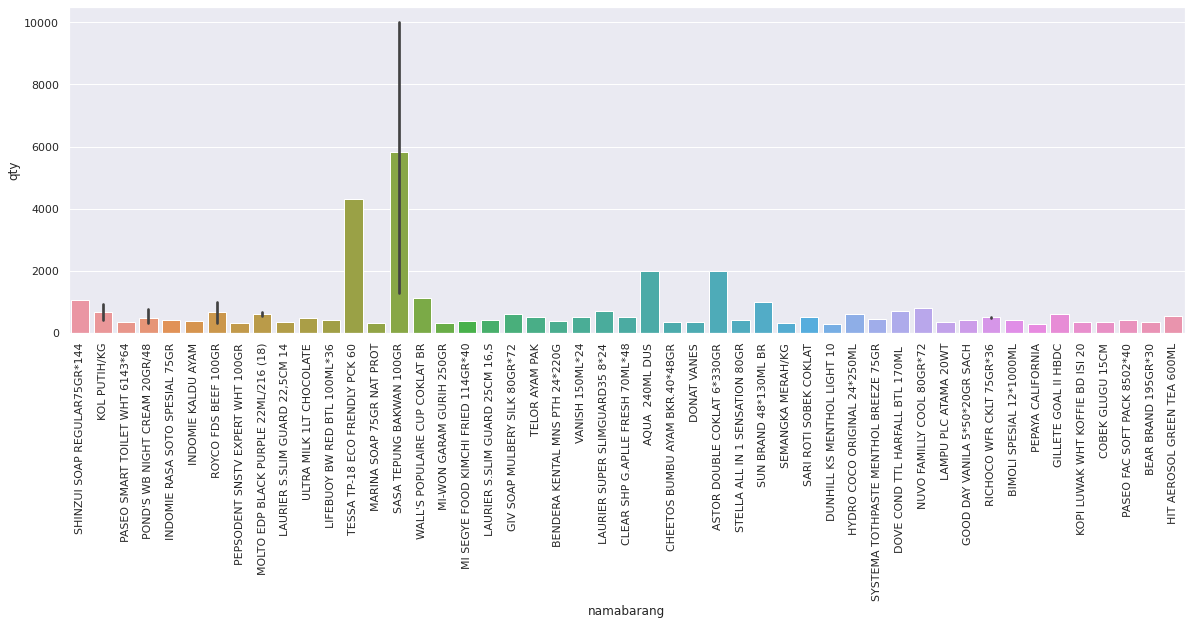

In [59]:
g = sns.barplot(x=df3to0.namabarang,
                y=df3to0.qty)
g.set_xticklabels(labels=df.namabarang ,rotation=90)
plt.show()

[Text(0, 0, 'FILMA 12*1000ML.REFFIL'),
 Text(0, 0, 'PEPSODENT WHITE 25GR*432'),
 Text(0, 0, 'AQUA 330ML*24'),
 Text(0, 0, 'INDOMIE GORENG SPECIAL'),
 Text(0, 0, 'SEDAAP MIE RASA SOTO'),
 Text(0, 0, 'LIFEBUOY TS NATURE PURE 85GR/144'),
 Text(0, 0, 'PEPSODENT WHITE 120GR*72'),
 Text(0, 0, 'PEPSODENT WHITE 75GR*144'),
 Text(0, 0, 'PEPSODENT WHITE 190GR*48'),
 Text(0, 0, 'GULA KRISTAL PUTIH KEMASAN 1 KG'),
 Text(0, 0, 'BUKU TULIS DODO 58LBR'),
 Text(0, 0, 'INDOMIE RASA SOTO SPESIAL 75GR'),
 Text(0, 0, 'INDOMIE AYAM BAWANG'),
 Text(0, 0, 'FRESCO KOPI GULA 10*12*20GR'),
 Text(0, 0, 'INDOMIE KALDU AYAM'),
 Text(0, 0, 'KUNCI MAS 12*1000ML REFFIL'),
 Text(0, 0, 'HAPPYTOS SEDANG 32*25GR'),
 Text(0, 0, 'BIMOLI 48*250ML'),
 Text(0, 0, 'PIRING AYUNADI'),
 Text(0, 0, 'SUNLIGHT LIME 12*800ML REF'),
 Text(0, 0, 'TAS BELANJA OXIUM 30*100PCS'),
 Text(0, 0, 'PONDS AM NIGHT CREAM 10GR*36'),
 Text(0, 0, 'TAS BELANJA OXIUM 37*100PCS'),
 Text(0, 0, 'CLOSE UP GREEN/MENTHOL 110Gr*48'),
 Text(0, 0, 'FAIR&LOVELY

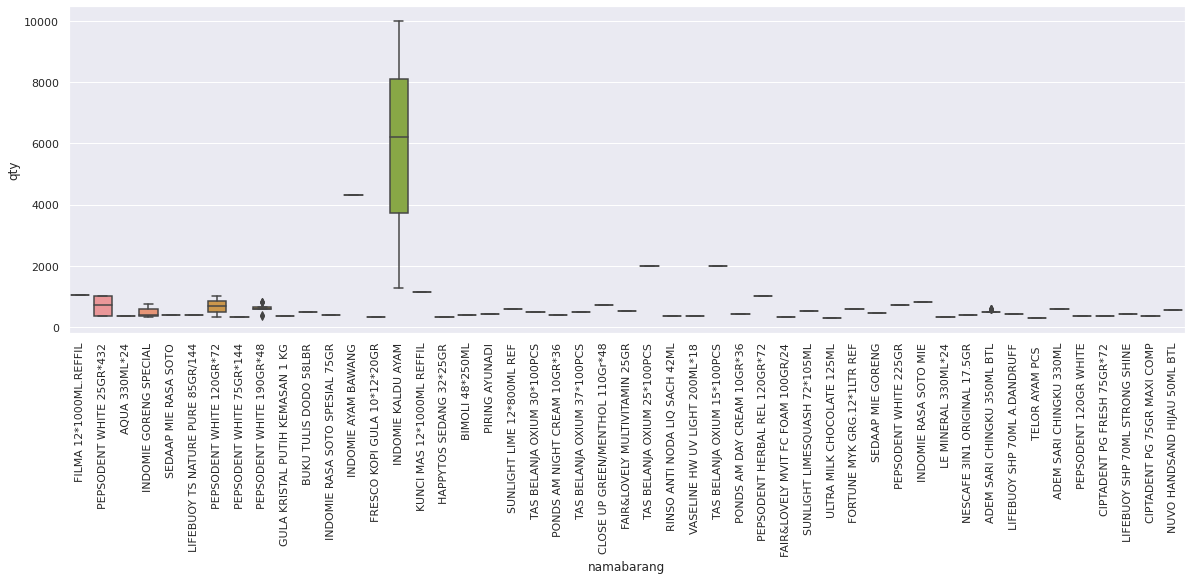

In [56]:
ax = sns.boxplot(x='namabarang', y='qty', data=df3to0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [21]:
# df_outlier = df.query('qty > 0 & qty <= 50')
# sns.set(rc={'figure.figsize':(20,6)})
# sns.boxplot(x='month_year', y='qty', data=df_outlier)

In [22]:
# df['satuan'].unique()

In [23]:
# df_kg = df[df['satuan'] == "KG"]
# df_kg.info()

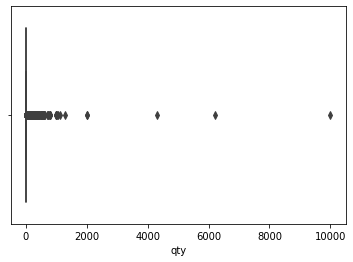

In [25]:
# reviewing the outlier of the number of products sold
ax = sns.boxplot(df['qty'])

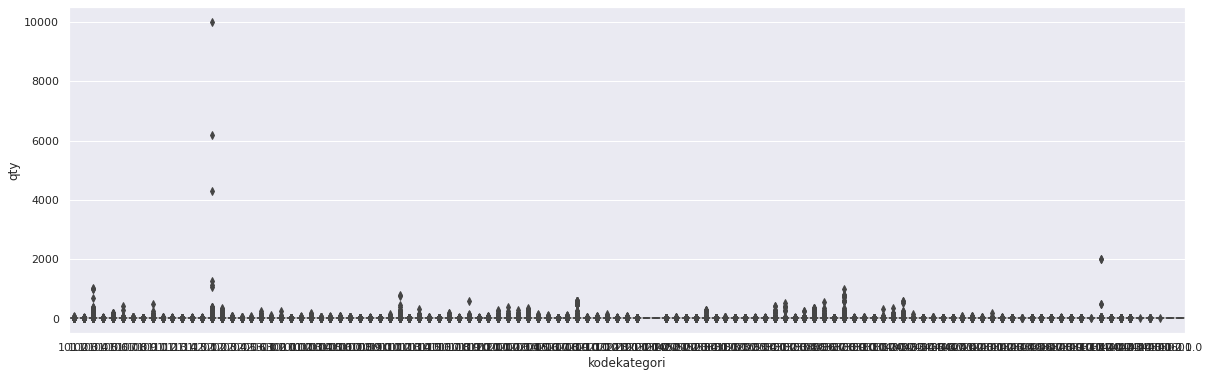

In [26]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='kodekategori', y='qty', data=df)

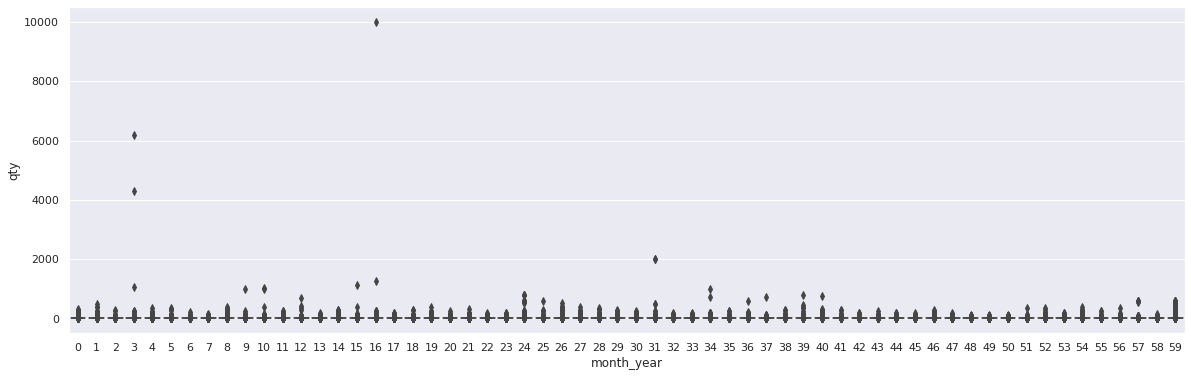

In [27]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='month_year', y='qty', data=df)

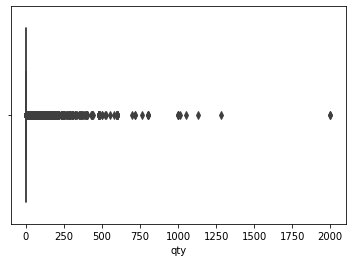

In [25]:
# reviewing the outlier of the number of products sold
ax = sns.boxplot(df['qty'])

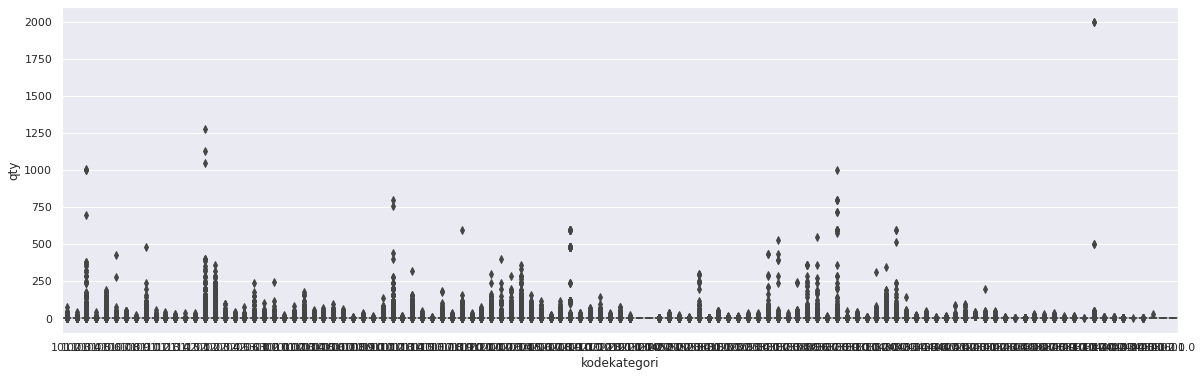

In [26]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='kodekategori', y='qty', data=df)

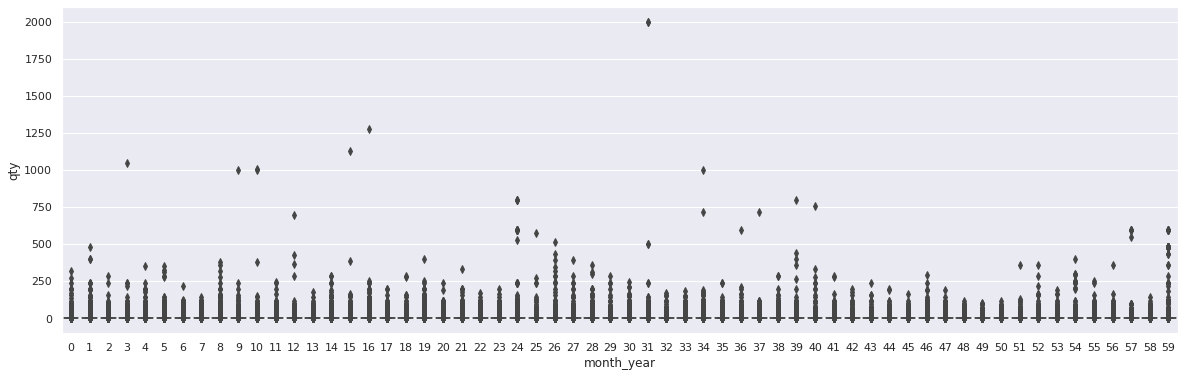

In [27]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='month_year', y='qty', data=df)

# Test - web fix

In [42]:
# data preprocessing for prediction january 2022

testing = df2021.copy()

testing['month_year'] = testing['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing['month_year'] = testing['month_year'].map({'01-21':0,'02-21':1,'03-21':2,'04-21':3,'05-21':4,'06-21':5,'07-21':6,'08-21':7,'09-21':8,'10-21':9,'11-21':10,'12-21':11})
# testing['month_year'] = testing['month_year'].map({'01-21':'Januari','02-21':'Februari','03-21':'Maret','04-21':'April','05-21':'Mei','06-21':'Juni','07-21':'Juli','08-21':'Agustus','09-21':'September','10-21':"Oktober",'11-21':'November','12-21':'Desember'})

test_monthly = testing[['tgl', 'month_year', 'barcode', 'qty']]
test_monthly = test_monthly.sort_values('tgl').groupby(['month_year', 'barcode'], as_index=False)
test_monthly = test_monthly.agg({'qty':['sum']})
test_monthly.columns = ['month_year', 'barcode', 'qty_cnt']
test_monthly = test_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

# Label
test_monthly['qty_cnt_month'] = test_monthly.sort_values('month_year').groupby(['barcode'])['qty_cnt'].shift(-1)

test_monthly_series = test_monthly.pivot_table(index=['barcode'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()

In [43]:
# display(test_monthly_series.nunique())
display(test_monthly_series.head())

month_year,barcode,0,1,2,3,4,5,6,7,8,9,10,11
0,00100809,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,00113731,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.75,0.78,0.45,1.72,0.32
2,00129213,38.39,0.00,1.95,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,00133173,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.26,0.00,0.00,0.00,0.00
4,00133210,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [44]:
# data preprocessing for prediction february 2022

testing_pred = df2022.copy()

testing_pred = testing_pred.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

testing_pred['month_year'] = testing_pred['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

testing_pred['month_year'] = testing_pred['month_year'].map({'01-22':0,'02-22':1})

testing_monthly_pred = testing_pred[['tgl', 'month_year', 'barcode', 'qty']]
testing_monthly_pred = testing_monthly_pred.sort_values('tgl').groupby(['month_year', 'barcode'], as_index=False)
testing_monthly_pred = testing_monthly_pred.agg({'qty':['sum']})
testing_monthly_pred.columns = ['month_year', 'barcode', 'qty_cnt']
# testing_monthly_pred = testing_monthly_pred.query('qty_cnt >= 0 and qty_cnt <= 50')
testing_monthly_pred = testing_monthly_pred.query('qty_cnt >= 0')

# Label
testing_monthly_pred['qty_cnt_month'] = testing_monthly_pred.sort_values('month_year').groupby(['barcode'])['qty_cnt'].shift(-1)

testing_monthly_series_pred = testing_monthly_pred.pivot_table(index=['barcode'], columns='month_year',values='qty_cnt', fill_value=0).reset_index()

In [45]:
print(f"Min date from data set: {testing_pred['tgl'].min().date()}")
print(f"Max date from data set: {testing_pred['tgl'].max().date()}")
print("Prediksi bulan januari & februari, karena penjualan bulan maret hanya tercatat pada tanggal 1")

Min date from data set: 2022-01-01
Max date from data set: 2022-03-01
Prediksi bulan januari & februari, karena penjualan bulan maret hanya tercatat pada tanggal 1


In [46]:
testing_monthly_series_pred.head()

month_year,barcode,0.0,1.0
0,00100809,5.67,2.89
1,00113731,0.87,0.00
2,00133241,20.52,36.09
3,00149457,6.05,7.65
4,00149815,8.21,12.49


In [47]:
pred_list = ['96770', '011747234207', '96842', '97162', '8992933211115', '8999999195670', '00100809', '9557062331128', '97515', '00149457']
df_pred_list = df[df['barcode'].isin(pred_list)].reset_index(drop=True)

In [48]:
df_pred_grouped = df_pred_list.groupby(["barcode", "namabarang"]).size().reset_index().rename(columns={0:'count'})
product_list = df_pred_grouped['barcode'].to_list()
namabarang = df_pred_grouped['namabarang'].to_list()

In [49]:
# get data selected product list from 2021 and 2022 for ploting on website

# product_list = ['011747233057', '011747234207', '055500130221']
# namabarang = ['DUA KELINCI KCG.GRG 10*750GR', 'DOLPIN GARAM 1000GR*12', 'SOS P.LANTAI ORANGE 750ML REFF']

selected_data_2021 = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)
selected_data_2022 = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True)
selected_data_2021['namabarang'] = namabarang
selected_data_2022['namabarang'] = namabarang
selected_data_2021 = selected_data_2021[['barcode', 'namabarang', 0, 1, 2, 3,  4, 5, 6, 7, 8, 9, 10, 11]]
selected_data_2022 = selected_data_2022[['barcode', 'namabarang', 0, 1]]
selected_data_2021.rename(columns = {0:'Januari', 1:'Februari', 2:'Maret', 3:'April', 4:'Mei', 5:'Juni', 6:'Juli', 7:'Agustus', 8:'September', 9:'Oktober', 10:'November', 11:'Desember'}, inplace = True)
selected_data_2022.rename(columns = {0:'Januari', 1:'Februari'}, inplace = True)
# selected_data_2022.drop(['barcode', 'kodejenis'], axis=1, inplace=True)
# appenned_data = df.append()
# # df_train_raw.to_csv('df_train_raw_new.csv', index=False)
display(selected_data_2021)
display(selected_data_2022)
# display(appenned_data)

month_year,barcode,namabarang,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,00100809,KACANG HIJAU / KG,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,00149457,MELON PUTIH/KG,14.10,1.38,12.59,11.06,8.71,4.14,8.12,1.13,8.30,13.51,9.53,9.14
2,011747234207,DOLPIN GARAM 1000GR*12,17.00,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00
3,8992933211115,NUTRIJELL STRAWBERRY 12,16.00,12.00,23.00,33.00,16.00,9.00,15.00,10.00,12.00,11.00,8.00,12.00
4,8999999195670,SARIWANGI TB ASLI 100*12 BR,26.00,18.00,38.00,21.00,17.00,18.00,21.00,14.00,23.00,18.00,17.00,28.00
5,9557062331128,MR.POTATO CRISPS ORG.14*160GR,23.00,9.00,12.00,14.00,20.00,18.00,11.00,12.00,18.00,12.00,14.00,26.00
6,96770,GELAS CJ-255,9.00,9.00,16.00,0.00,11.00,13.00,0.00,0.00,5.00,6.00,1.00,4.00
7,96842,SISIR GARPU HITAM,0.00,0.00,0.00,4.00,3.00,1.00,2.00,1.00,1.00,0.00,0.00,0.00
8,97162,GELAS POLOS HS-9N,6.00,16.00,13.00,8.00,16.00,23.00,1.00,0.00,0.00,12.00,0.00,8.00
9,97515,"MASKING TAPE 2"" TBL BERRY",3.00,6.00,0.00,6.00,7.00,1.00,6.00,3.00,0.00,3.00,3.00,6.00


month_year,barcode,namabarang,Januari,Februari
0,00100809,KACANG HIJAU / KG,5.67,2.89
1,00149457,MELON PUTIH/KG,6.05,7.65
2,011747234207,DOLPIN GARAM 1000GR*12,12.00,8.00
3,8992933211115,NUTRIJELL STRAWBERRY 12,9.00,8.00
4,8999999195670,SARIWANGI TB ASLI 100*12 BR,37.00,38.00
5,9557062331128,MR.POTATO CRISPS ORG.14*160GR,17.00,10.00
6,96770,GELAS CJ-255,8.00,0.00
7,96842,SISIR GARPU HITAM,5.00,4.00
8,97162,GELAS POLOS HS-9N,16.00,4.00
9,97515,"MASKING TAPE 2"" TBL BERRY",8.00,4.00


In [ ]:
# selected_data_2021.to_csv('riwayat_pred_jan.csv', index=False)
# selected_data_2021.drop(['Januari'], axis=1, inplace=True)
# selected_data_2021['Januari'] = selected_data_2022['Januari']
# selected_data_2021.to_csv('riwayat_pred_feb.csv', index=False)

In [50]:
selected_data_2021

month_year,barcode,namabarang,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,00100809,KACANG HIJAU / KG,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,00149457,MELON PUTIH/KG,14.10,1.38,12.59,11.06,8.71,4.14,8.12,1.13,8.30,13.51,9.53,9.14
2,011747234207,DOLPIN GARAM 1000GR*12,17.00,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00
3,8992933211115,NUTRIJELL STRAWBERRY 12,16.00,12.00,23.00,33.00,16.00,9.00,15.00,10.00,12.00,11.00,8.00,12.00
4,8999999195670,SARIWANGI TB ASLI 100*12 BR,26.00,18.00,38.00,21.00,17.00,18.00,21.00,14.00,23.00,18.00,17.00,28.00
5,9557062331128,MR.POTATO CRISPS ORG.14*160GR,23.00,9.00,12.00,14.00,20.00,18.00,11.00,12.00,18.00,12.00,14.00,26.00
6,96770,GELAS CJ-255,9.00,9.00,16.00,0.00,11.00,13.00,0.00,0.00,5.00,6.00,1.00,4.00
7,96842,SISIR GARPU HITAM,0.00,0.00,0.00,4.00,3.00,1.00,2.00,1.00,1.00,0.00,0.00,0.00
8,97162,GELAS POLOS HS-9N,6.00,16.00,13.00,8.00,16.00,23.00,1.00,0.00,0.00,12.00,0.00,8.00
9,97515,"MASKING TAPE 2"" TBL BERRY",3.00,6.00,0.00,6.00,7.00,1.00,6.00,3.00,0.00,3.00,3.00,6.00


In [ ]:
# get 5 products for prediction

# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True) # 2021 data
# df_pred_2022 = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True) # 2022 data
# df_pred = df_pred.drop_duplicates(subset=['barcode', 'kodejenis'])
# df_pred.fillna(0, inplace=True)
# df_pred.drop(['barcode', 'kodejenis'], axis=1, inplace=True)

In [ ]:
# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred_jan = test_monthly_series[test_monthly_series['barcode'].isin(product_list)].reset_index(drop=True)
# df_pred_jan.drop(['kodejenis'], axis=1, inplace=True)
# df_pred_jan.drop([0], axis=1, inplace=True)
# df_pred_jan.head()
# df_pred_jan.to_csv('df_pred_jan.csv', index=False)

In [ ]:
# get 5 products for prediction

# product_list = ['011747233057', '011747234207', '055500130221']

# df_pred_feb = testing_monthly_series_pred[testing_monthly_series_pred['barcode'].isin(product_list)].reset_index(drop=True)
# df_pred_feb.drop(['kodejenis'], axis=1, inplace=True)
# df_pred_feb
# df_pred_feb[0]
# df_pred_jan[12] = df_pred_feb[0]
# df_pred_jan
# df_pred_jan.to_csv('df_pred_feb.csv', index=False)

In [ ]:
# df_pred.to_csv('df_pred.csv', index=False)

In [30]:
# import dataset for prediction
jan = pd.read_csv('./riwayat_pred_jan.csv')
feb = pd.read_csv('./riwayat_pred_feb.csv')

In [31]:
# drop unnecessary column

X_jan = jan.drop_duplicates(subset=['barcode'])
X_jan.fillna(0, inplace=True)
X_jan.drop(['barcode', 'namabarang'], axis=1, inplace=True)

X_feb = feb.drop_duplicates(subset=['barcode'])
X_feb.fillna(0, inplace=True)
X_feb.drop(['barcode', 'namabarang'], axis=1, inplace=True)

In [32]:
display(X_jan)
display(X_feb)

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59
1,14.10,1.38,12.59,11.06,8.71,4.14,8.12,1.13,8.30,13.51,9.53,9.14
2,17.00,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00
3,16.00,12.00,23.00,33.00,16.00,9.00,15.00,10.00,12.00,11.00,8.00,12.00
4,26.00,18.00,38.00,21.00,17.00,18.00,21.00,14.00,23.00,18.00,17.00,28.00
5,23.00,9.00,12.00,14.00,20.00,18.00,11.00,12.00,18.00,12.00,14.00,26.00
6,9.00,9.00,16.00,0.00,11.00,13.00,0.00,0.00,5.00,6.00,1.00,4.00
7,0.00,0.00,0.00,4.00,3.00,1.00,2.00,1.00,1.00,0.00,0.00,0.00
8,6.00,16.00,13.00,8.00,16.00,23.00,1.00,0.00,0.00,12.00,0.00,8.00
9,3.00,6.00,0.00,6.00,7.00,1.00,6.00,3.00,0.00,3.00,3.00,6.00


,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari
0,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59,5.67
1,1.38,12.59,11.06,8.71,4.14,8.12,1.13,8.30,13.51,9.53,9.14,6.05
2,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00,12.00
3,12.00,23.00,33.00,16.00,9.00,15.00,10.00,12.00,11.00,8.00,12.00,9.00
4,18.00,38.00,21.00,17.00,18.00,21.00,14.00,23.00,18.00,17.00,28.00,37.00
5,9.00,12.00,14.00,20.00,18.00,11.00,12.00,18.00,12.00,14.00,26.00,17.00
6,9.00,16.00,0.00,11.00,13.00,0.00,0.00,5.00,6.00,1.00,4.00,8.00
7,0.00,0.00,4.00,3.00,1.00,2.00,1.00,1.00,0.00,0.00,0.00,5.00
8,16.00,13.00,8.00,16.00,23.00,1.00,0.00,0.00,12.00,0.00,8.00,16.00
9,6.00,0.00,6.00,7.00,1.00,6.00,3.00,0.00,3.00,3.00,6.00,8.00


In [33]:
# reshape the predict dataset

X_reshaped_jan = X_jan.values.reshape((X_jan.shape[0], X_jan.shape[1], 1))
display(X_reshaped_jan.shape)

X_reshaped_feb = X_feb.values.reshape((X_feb.shape[0], X_feb.shape[1], 1))
display(X_reshaped_feb.shape)

(10, 12, 1)

(10, 12, 1)

In [56]:
# gru_model = load_model('gru_model-bs32_hn64_month0_year2018-2021_limit.h5')
gru_model = load_model('gru_model-bs32_hn64_month0_year2018-2021_unlimit.h5')
# gru_model = load_model('gru_model-bs32_hn64_month35.h5')

In [57]:
# predict the dataset

model_pred_jan = gru_model.predict(X_reshaped_jan)
model_pred_feb = gru_model.predict(X_reshaped_feb)

In [58]:
model_pred_feb

array([[ 3.4591503],
       [ 7.145838 ],
       [13.543987 ],
       [ 9.63516  ],
       [24.644033 ],
       [14.857368 ],
       [ 5.7476635],
       [ 0.5739441],
       [10.645405 ],
       [ 4.4721947]], dtype=float32)

In [59]:
# get back the barcode to pairing the prediction

barcode_pred_jan = jan[['barcode', 'namabarang']]
barcode_pred_feb = feb[['barcode', 'namabarang']]

prediction_jan = pd.DataFrame(barcode_pred_jan[['barcode', 'namabarang']], columns=['barcode', 'namabarang'])
prediction_jan['prediction_january'] = pd.DataFrame(model_pred_jan)
display(prediction_jan)

prediction_feb = pd.DataFrame(barcode_pred_feb[['barcode', 'namabarang']], columns=['barcode', 'namabarang'])
prediction_feb['prediction_february'] = pd.DataFrame(model_pred_feb)
display(prediction_feb)

# pred.to_csv('gru_submission.csv', index=False)

,barcode,namabarang,prediction_january
0,100809,KACANG HIJAU / KG,2.67
1,149457,MELON PUTIH/KG,8.16
2,11747234207,DOLPIN GARAM 1000GR*12,16.31
3,8992933211115,NUTRIJELL STRAWBERRY 12,10.63
4,8999999195670,SARIWANGI TB ASLI 100*12 BR,20.56
5,9557062331128,MR.POTATO CRISPS ORG.14*160GR,16.17
6,96770,GELAS CJ-255,4.61
7,96842,SISIR GARPU HITAM,-0.49
8,97162,GELAS POLOS HS-9N,9.33
9,97515,"MASKING TAPE 2"" TBL BERRY",3.36


,barcode,namabarang,prediction_february
0,100809,KACANG HIJAU / KG,3.46
1,149457,MELON PUTIH/KG,7.15
2,11747234207,DOLPIN GARAM 1000GR*12,13.54
3,8992933211115,NUTRIJELL STRAWBERRY 12,9.64
4,8999999195670,SARIWANGI TB ASLI 100*12 BR,24.64
5,9557062331128,MR.POTATO CRISPS ORG.14*160GR,14.86
6,96770,GELAS CJ-255,5.75
7,96842,SISIR GARPU HITAM,0.57
8,97162,GELAS POLOS HS-9N,10.65
9,97515,"MASKING TAPE 2"" TBL BERRY",4.47


In [60]:
selected_data_2022

month_year,barcode,namabarang,Januari,Februari
0,00100809,KACANG HIJAU / KG,5.67,2.89
1,00149457,MELON PUTIH/KG,6.05,7.65
2,011747234207,DOLPIN GARAM 1000GR*12,12.00,8.00
3,8992933211115,NUTRIJELL STRAWBERRY 12,9.00,8.00
4,8999999195670,SARIWANGI TB ASLI 100*12 BR,37.00,38.00
5,9557062331128,MR.POTATO CRISPS ORG.14*160GR,17.00,10.00
6,96770,GELAS CJ-255,8.00,0.00
7,96842,SISIR GARPU HITAM,5.00,4.00
8,97162,GELAS POLOS HS-9N,16.00,4.00
9,97515,"MASKING TAPE 2"" TBL BERRY",8.00,4.00


In [61]:
pred_jan = prediction_jan["prediction_january"]
pred_feb = prediction_feb["prediction_february"]

In [62]:
actual_jan = selected_data_2022['Januari']
actual_feb = selected_data_2022['Februari']

In [54]:
def mape(actual, pred): #gru_model-bs32_hn64_month0_year2018-2021_limit.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)
# mape(actual_feb, pred_feb)

43.57526870641458

In [55]:
print('Prediction rmse:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse: 6.563081560502857
Prediction rmse: 6.298820322517257


In [65]:
def mape(actual, pred): #gru_model-bs32_hn64_month0_year2018-2021_unlimit.h5
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(actual_jan, pred_jan)

44.3284728843753

In [66]:
print('Prediction rmse:', np.sqrt(mean_squared_error(actual_jan, pred_jan)))
print('Prediction rmse:', np.sqrt(mean_squared_error(actual_feb, pred_feb)))

Prediction rmse: 6.43022532315772
Prediction rmse: 5.70193745538764


## Loading data

In [31]:
# df2015 = pd.read_csv('./data-2015-renew.csv')
df2016 = pd.read_csv('./data-2016-renew.csv', parse_dates=['tgl'])
df2017 = pd.read_csv('./data-2017-renew.csv', parse_dates=['tgl'])
df2018 = pd.read_csv('./data-2018-renew.csv', parse_dates=['tgl'])
df2019 = pd.read_csv('./data-2019-renew.csv', parse_dates=['tgl'])
df2020 = pd.read_csv('./data-2020-renew.csv', parse_dates=['tgl'])
df2021 = pd.read_csv('./data-2021-renew.csv', parse_dates=['tgl'])
df2022 = pd.read_csv('./data-2022-renew.csv', parse_dates=['tgl'])

In [32]:
product_list = ['011747233057', '011747234207', '055500130221']

selected_data_2021 = df2021[df2021['barcode'].isin(product_list)].reset_index(drop=True)
namabarang = ['DUA KELINCI KCG.GRG 10*750GR', 'DOLPIN GARAM 1000GR*12', 'SOS P.LANTAI ORANGE 750ML REFF']

In [33]:
# drop unnecessary column

# df2016 = df2016.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2017 = df2017.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2018 = df2018.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2019 = df2019.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2020 = df2020.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2021 = df2021.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2022 = df2022.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [34]:
df = pd.concat([df2017, df2018, df2019, df2020, df2021])
# df = pd.concat([df2017, df2018, df2019, df2020, df2021, df2022])
# df = pd.concat([df2021, df2022])
df['year_month'] = df['tgl'].apply(lambda x: x.strftime('%Y-%m')).astype(str)
df['month_yr'] = df['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)
# 2017-2021
df['month_yr'] = df['month_yr'].map({'01-17':0,'02-17':1,'03-17':2,'04-17':3,'05-17':4,'06-17':5,'07-17':6,'08-17':7,'09-17':8,'10-17':9,'11-17':10,'12-17':11,
                                          '01-18':12,'02-18':13,'03-18':14,'04-18':15,'05-18':16,'06-18':17,'07-18':18,'08-18':19,'09-18':20,'10-18':21,'11-18':22,'12-18':23,
                                          '01-19':24,'02-19':25,'03-19':26,'04-19':27,'05-19':28,'06-19':29,'07-19':30,'08-19':31,'09-19':32,'10-19':33,'11-19':34,'12-19':35,
                                          '01-20':36,'02-20':37,'03-20':38,'04-20':39,'05-20':40,'06-20':41,'07-20':42,'08-20':43,'09-20':44,'10-20':45,'11-20':46,'12-20':47,
                                          '01-21':48,'02-21':49,'03-21':50,'04-21':51,'05-21':52,'06-21':53,'07-21':54,'08-21':55,'09-21':56,'10-21':57,'11-21':58,'12-21':59})
# df['month_yr'] = df['month_yr'].map({'01-17':0,'02-17':1,'03-17':2,'04-17':3,'05-17':4,'06-17':5,'07-17':6,'08-17':7,'09-17':8,'10-17':9,'11-17':10,'12-17':11,
#                                           '01-18':12,'02-18':13,'03-18':14,'04-18':15,'05-18':16,'06-18':17,'07-18':18,'08-18':19,'09-18':20,'10-18':21,'11-18':22,'12-18':23,
#                                           '01-19':24,'02-19':25,'03-19':26,'04-19':27,'05-19':28,'06-19':29,'07-19':30,'08-19':31,'09-19':32,'10-19':33,'11-19':34,'12-19':35,
#                                           '01-20':36,'02-20':37,'03-20':38,'04-20':39,'05-20':40,'06-20':41,'07-20':42,'08-20':43,'09-20':44,'10-20':45,'11-20':46,'12-20':47,
#                                           '01-21':48,'02-21':49,'03-21':50,'04-21':51,'05-21':52,'06-21':53,'07-21':54,'08-21':55,'09-21':56,'10-21':57,'11-21':58,'12-21':59,
#                                           '01-22':60,'02-22':61,'03-22':62})
print(f"Min date from data set: {df['tgl'].min().date()}")
print(f"Max date from data set: {df['tgl'].max().date()}")

Min date from data set: 2017-01-01
Max date from data set: 2021-12-31


In [ ]:
df_train = pd.concat([df2017, df2018, df2019, df2020, df2021])
df_train['year_month'] = df_train['tgl'].apply(lambda x: x.strftime('%Y-%m')).astype(str)
df_train['month_yr'] = df_train['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)
# 2017-2021
df_train['month_yr'] = df_train['month_yr'].map({'01-17':0,'02-17':1,'03-17':2,'04-17':3,'05-17':4,'06-17':5,'07-17':6,'08-17':7,'09-17':8,'10-17':9,'11-17':10,'12-17':11,
                                          '01-18':12,'02-18':13,'03-18':14,'04-18':15,'05-18':16,'06-18':17,'07-18':18,'08-18':19,'09-18':20,'10-18':21,'11-18':22,'12-18':23,
                                          '01-19':24,'02-19':25,'03-19':26,'04-19':27,'05-19':28,'06-19':29,'07-19':30,'08-19':31,'09-19':32,'10-19':33,'11-19':34,'12-19':35,
                                          '01-20':36,'02-20':37,'03-20':38,'04-20':39,'05-20':40,'06-20':41,'07-20':42,'08-20':43,'09-20':44,'10-20':45,'11-20':46,'12-20':47,
                                          '01-21':48,'02-21':49,'03-21':50,'04-21':51,'05-21':52,'06-21':53,'07-21':54,'08-21':55,'09-21':56,'10-21':57,'11-21':58,'12-21':59})
print(f"Min date from data set: {df_train['tgl'].min().date()}")
print(f"Max date from data set: {df_train['tgl'].max().date()}")

# EDA 1

In [19]:
barcode_u = len(pd.unique(df['barcode']))
jenis_u = len(pd.unique(df['kodejenis']))
kategori_u = len(pd.unique(df['kodekategori']))
print('Unique Barcode:',barcode_u)
print('Unique Kode Jenis:',jenis_u)
print('Unique Kode Kategori:',kategori_u)

Unique Barcode: 31024
Unique Kode Jenis: 573
Unique Kode Kategori: 114


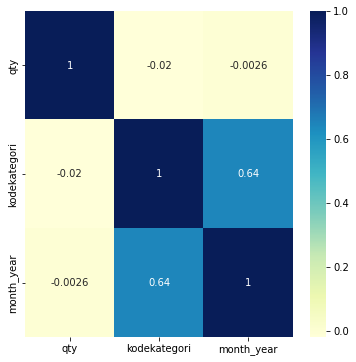

In [20]:
corr = df.corr()
top_corr_features = corr.index[abs(corr["qty"])>0]

plt.figure(figsize=(6,6))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [23]:
# plt.scatter(df_train['hargajual'], df_train['qty'], color = "red")
# plt.show()

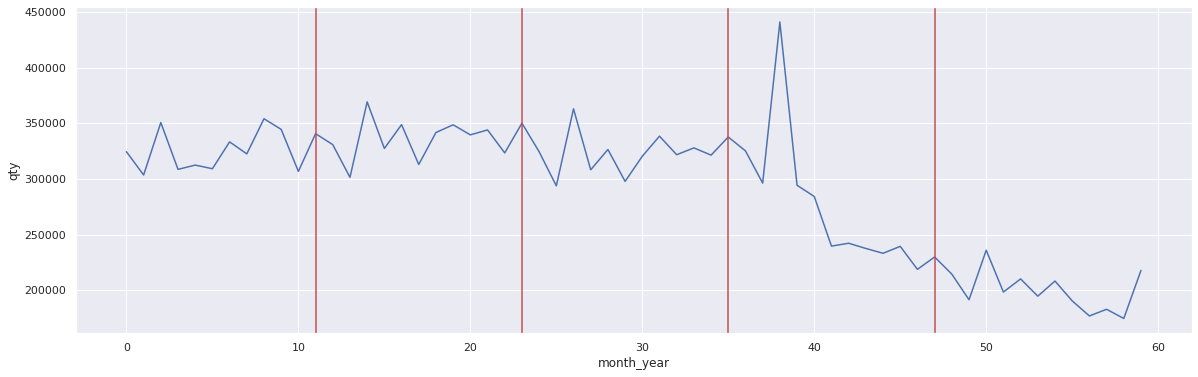

In [23]:
df_plot = df.groupby(['month_year'],as_index=False).sum()
df_plot.head()
sns.set(rc={'figure.figsize':(20,6)})
sns.lineplot(x='month_year', y='qty', data=df_plot)
plt.axvline(x=11, ymin=0, ymax=1, color='r')
plt.axvline(x=23, ymin=0, ymax=1, color='r')
plt.axvline(x=35, ymin=0, ymax=1, color='r')
plt.axvline(x=47, ymin=0, ymax=1, color='r')

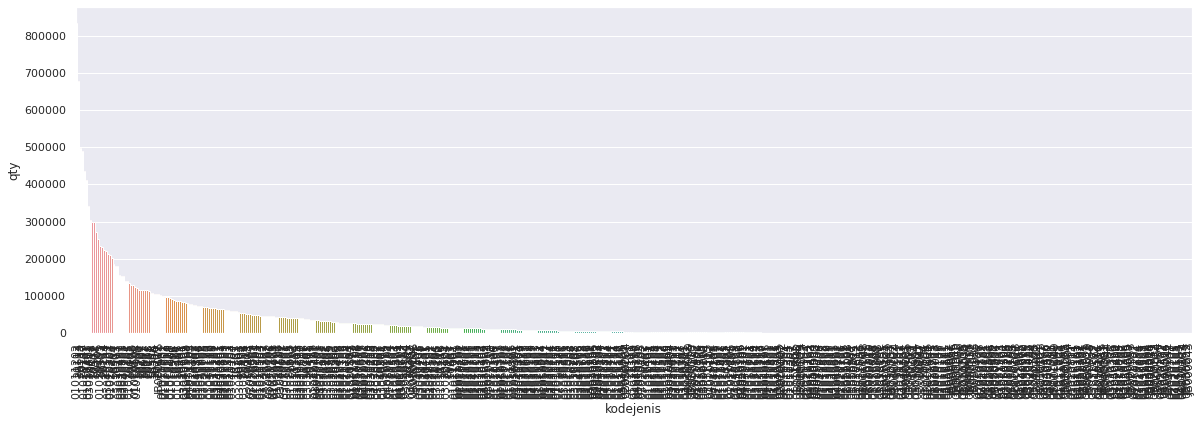

In [25]:
df_s = df.groupby(['kodejenis'],as_index=False).sum().sort_values("qty", ascending=False)
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x='kodejenis', y='qty', data=df_s, )
plt.xticks(rotation=90)
plt.show()

In [26]:
# df_train_p = df_train.groupby(['hargajual'],as_index=False).sum()
# sns.set(rc={'figure.figsize':(15,6)})
# sns.lineplot(x='hargajual', y='qty', data=df_train_p)

In [27]:
# Handling Outliers
# df = df[df['hargajual'] < 6000]
# df_el = df[df['qty'] >= 0]

In [28]:
# df_train = df_train[df_train['qty']>0]

In [24]:
# drop rows wich contains negative and zero values
df[df['qty']<=0].count()

tgl             16
namabarang      16
satuan          16
qty             16
barcode         16
kodecustomer    16
kodejenis       16
jenis           16
kodekategori    16
kategori        16
month_year      16
dtype: int64

#Select Kategori

In [ ]:
# print("kodekategori 2016: ", df2016['kodekategori'].unique())
# print("kategori 2016: ", df2016['kategori'].unique())
# print("2017: ", df2017['kategori'].unique())
# print("2018: ", df2018['kategori'].unique())
# print("2019: ", df2019['kategori'].unique())
# print("2020: ", df2020['kategori'].unique())

In [ ]:
# get unique kategori value

group_kategori2016 = df2016.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2017 = df2017.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2018 = df2018.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2019 = df2019.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2020 = df2020.groupby('kodekategori')['kategori'].unique().reset_index()
group_kategori2021 = df2021.groupby('kodekategori')['kategori'].unique().reset_index()

# pdList = [group_kategori2016, group_kategori2017, group_kategori2018, group_kategori2019]
pdList = [group_kategori2016, group_kategori2017, group_kategori2018, group_kategori2019, group_kategori2020, group_kategori2021]

new_kategori = pd.concat(pdList).reset_index(drop=True)
new_kategori['kodekategori'] = new_kategori['kodekategori'].astype(float)
new_kategori['kategori'] = new_kategori['kategori'].astype(str)

clean_kategori = new_kategori.drop_duplicates(subset=['kodekategori']).reset_index(drop=True)

In [ ]:
display(clean_kategori)

,kodekategori,kategori
0,101.00,['Baby Needs']
1,102.00,['Mens Care (2)']
2,103.00,['Healt & Beauty Care (3)']
3,104.00,['Kids Care (4)']
4,105.00,['Cleaning (5)']
5,106.00,['Homes (6)']
6,107.00,['Electronic & Tool kits (7)']
7,108.00,['Automotive (8)']
8,109.00,['Stationery (9)']
9,110.00,['Toys (10)']


In [ ]:
# initiate the kategori list that will removed from dataset

kategori_remove_name = ["Fresh Food (6)", "Roti dan Kue (Bread & Cake)", "Sarapan Pagi (Breakfast)", "Makanan Mentah (Raw Food)", "Ice", "Makanan Masak (Cooked Food)", "Buah (Fruit)", "Sayur (Vegetable)", "Harian (Daily)", "Beku (Frozen)", "Telur (Egg)", "Produk Siap Makan (Ready To Eat)", "Daging Merah (Red Meat)", "Daging Putih (White Meat)"]
kategori_remove_list = ["206.00", "10104.00", "10105.00", "10108.00", "10109.00", "10110.00", "20101.00", "20201.00", "20502.00", "20503.00", "20504.00", "20601.00", "20301.00", "20302.00"]

In [ ]:
# drop unnecessary kategori

# init = df_train.copy()
# init = init[~init['kategori'].isin(kategori_remove_name)].reset_index(drop=True)
# df_train = df_train[~df_train['kategori'].isin(kategori_remove_name)].reset_index(drop=True)

In [ ]:
df.head()

,tgl,satuan,qty,hargajual,barcode,kodejenis,kodekategori,kategori,year_month,month_yr
0,2017-10-08 10:21:56.667,PCS,2.00,3850.00,8992946511790,10301,103.00,Healt & Beauty Care (3),2017-10,9
1,2017-06-10 15:14:28.343,KG,0.19,10000.00,00172677,20607,206.00,Fresh Food (6),2017-06,5
2,2017-09-18 20:38:05.290,PCS,1.00,7250.00,8993053211672,10507,105.00,Cleaning (5),2017-09,8
3,2017-02-03 19:58:25.060,PCS,1.00,17300.00,8999999056872 - 22/07/2020,10302,103.00,Healt & Beauty Care (3),2017-02,1
4,2017-05-27 15:44:34.500,PCS,2.00,2100.00,089686910384,20113,201.00,Food (1),2017-05,4


#EDA

In [ ]:
# overall sales trend
df_trend = df.groupby('year_month').sum()['qty'].reset_index()

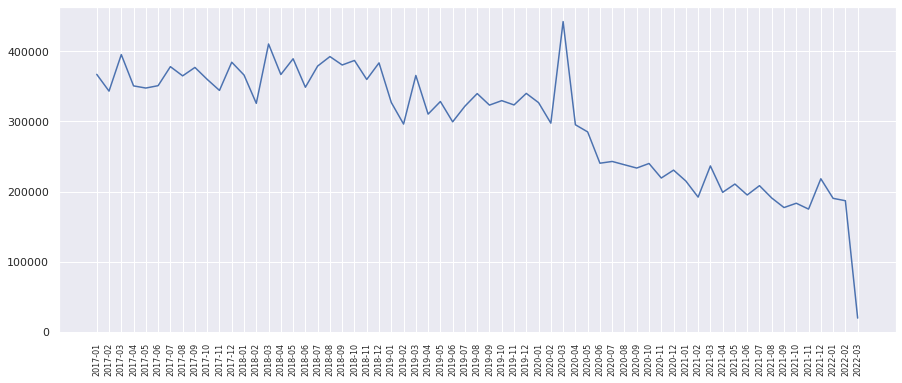

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df_trend['year_month'], df_trend['qty'])
plt.xticks(rotation='vertical', size=8)
plt.show()

In [ ]:
df.nunique()

tgl             12606365
satuan                60
qty                 3663
hargajual           5245
barcode            31397
kodejenis            582
kodekategori         116
kategori             116
year_month            63
month_yr              63
dtype: int64

In [ ]:
# top 10 most selling poducts
prod_sales = pd.DataFrame(df.groupby('barcode').sum()['qty'])

In [ ]:
prod_sales = prod_sales.sort_values('qty', ascending=False)

In [ ]:
prod_sales[:10]

,qty
barcode,
56102,380521.56
56103,273262.30
089686010947,245563.00
8998866200301,173691.00
8992696404441,104711.00
56101,103481.00
8998866200325,84903.00
13662,78165.00
8886008101336,76402.00


In [ ]:
daily_sales = df.groupby("year_month", as_index=False)['qty'].sum()
# store_daily_sales = df.groupby(['store', 'year_month'], as_index=False)['sales'].sum()
item_daily_sales = df.groupby(['barcode', 'year_month'], as_index=False)['qty'].sum()

In [ ]:
# dail sales

daily_sales_sc = go.Scatter(x=daily_sales['year_month'], y=daily_sales['qty'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='year_month'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[daily_sales_sc], layout=layout)
iplot(fig)

In [ ]:
%ls

data-2015-renew.csv  data-2022-renew.csv   df_train_raw.csv
data-2016-renew.csv  df_pred.csv           df_train_raw_new.csv
data-2017-renew.csv  df_pred_feb.csv       gru_model.h5
data-2018-renew.csv  df_pred_jan.csv       gru_model.sav
data-2019-renew.csv  df_train.csv          kategori_delist.csv
data-2020-renew.csv  df_train_feb_new.csv  test_result.csv
data-2021-renew.csv  df_train_jan_new.csv


In [ ]:
from keras.models import load_model

In [ ]:
jan = pd.read_csv('df_pred_jan.csv')
feb = pd.read_csv('df_pred_feb.csv')
gru_model = load_model('gru_model.h5')

In [ ]:
display(jan)
display(feb)

,barcode,0,1,2,3,4,5,6,7,8,9,10,11
0,11747233057,2.00,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00
1,11747234207,17.00,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00
2,55500130221,10.00,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00


,barcode,1,2,3,4,5,6,7,8,9,10,11,12
0,11747233057,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00,0.00
1,11747234207,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00,12.00
2,55500130221,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00,11.00


In [ ]:
# get data selected product list from 2021 and 2022 for ploting on website

product_list = ['011747233057', '011747234207', '055500130221']

# selected_data = jan[jan['barcode'].isin(product_list)].reset_index(drop=True)
# drop_jan = jan.drop(['barcode'], axis=1, inplace=True)
# drop_feb = feb.drop(['barcode'], axis=1, inplace=True)
drop_jan = jan.iloc[:, 1:]
drop_feb = feb.iloc[:, 1:]

display(drop_jan)
display(drop_feb)

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.00,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00
1,17.00,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00
2,10.00,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00


,1,2,3,4,5,6,7,8,9,10,11,12
0,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00,0.00
1,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00,12.00
2,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00,11.00


In [ ]:
bb = feb.columns
bb

Index(['barcode', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12'],
      dtype='object')

In [ ]:
jann = jan.T

In [ ]:
print(jan.iloc[:, :1].values)
print(jan.iloc[:, 1:].values)
print(jan.columns[1:].values)

[[11747233057]
 [11747234207]
 [55500130221]]
[[ 2.  5. 11.  2.  6.  4.  1.  6.  1.  0.  3.  4.]
 [17.  9. 12. 14. 12. 19. 14. 15. 14. 16. 20. 24.]
 [10. 17. 19.  9. 10.  8. 16. 10.  4. 13.  7.  3.]]
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11']


In [ ]:
X_jan = drop_jan.values.reshape((drop_jan.shape[0], drop_jan.shape[1], 1))
X_feb = drop_feb.values.reshape((drop_feb.shape[0], drop_feb.shape[1], 1))
jan_pred = gru_model.predict(X_jan)
feb_pred = gru_model.predict(X_feb)

In [ ]:
display(jan_pred)
display(feb_pred)

array([[ 3.6488318],
       [19.308125 ],
       [ 7.7799997]], dtype=float32)

array([[ 2.238058],
       [16.649498],
       [10.354751]], dtype=float32)

In [ ]:
# pred = pd.DataFrame({'jan_pred': jan_pred.flatten(), 'feb_pred': feb_pred.flatten()}, index=[0])
# pred

In [ ]:
last = feb.iloc[:, -1:] # get last column (12)

In [ ]:
feb['13'] = feb_pred

In [ ]:
# feb.info()
feb

,barcode,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11747233057,5.00,11.00,2.00,6.00,4.00,1.00,6.00,1.00,0.00,3.00,4.00,0.00,2.24
1,11747234207,9.00,12.00,14.00,12.00,19.00,14.00,15.00,14.00,16.00,20.00,24.00,12.00,16.65
2,55500130221,17.00,19.00,9.00,10.00,8.00,16.00,10.00,4.00,13.00,7.00,3.00,11.00,10.35


In [ ]:
# transform data to get january and february 2022 sales product record
train_monthly = df[['tgl', 'month_yr', 'kodejenis', 'barcode', 'qty']].copy()
train_monthly = train_monthly.sort_values('tgl').groupby(['month_yr', 'kodejenis', 'barcode'], as_index=False)
train_monthly = train_monthly.agg({'qty':['sum']})
train_monthly.columns = ['month_yr', 'kodejenis', 'barcode', 'qty_cnt']
train_monthly = train_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

train_monthly['qty_cnt_month'] = train_monthly.sort_values('month_yr').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)
monthly_series = train_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_yr',values='qty_cnt', fill_value=0).reset_index()
monthly_series.head()

month_yr,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,00100809,01011601,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.69,15.35,20.38,13.80,7.03,8.72,11.13,11.36,16.29,7.11,10.22,11.02,12.75,10.78,27.13,32.93,18.57,11.34,13.62,12.14,8.19,4.22,2.76,3.97,7.23,3.75,5.23,5.37,4.12,2.11,2.75,5.56,4.12,3.13,1.68,3.59,5.67,2.89,0.30
1,00100809,20604,8.04,10.89,15.34,14.70,15.63,20.85,11.92,16.73,14.30,14.26,11.93,11.39,14.40,12.55,20.04,15.83,14.22,19.72,20.78,19.90,12.00,11.78,14.68,14.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,00113731,02020101,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.60,3.46,4.43,4.75,6.09,4.07,5.42,4.27,4.89,3.76,3.62,2.89,3.61,0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.75,0.78,0.45,1.72,0.32,0.87,0.00,0.00
3,00113731,20607,1.51,0.00,0.00,0.00,0.00,0.00,0.00,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,00125789,02010120,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,9.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# select product from selected barcode
monthly_series_list = ['011747233057', '011747234207', '055500130221']
monthly_series_select = monthly_series[monthly_series['barcode'].isin(product_list)].reset_index(drop=True)

In [ ]:
# pikirin lagi karena 1 barcode memiliki lebih dari 1 kodejenis, gunakan berdasarkan kodejenis atau kodekategori
monthly_series_select = monthly_series_select.drop_duplicates(subset=['barcode']) # drop duplicates barcode
# selected_product_2022 = monthly_series_select.iloc[:, 62:-1]
selected_product_2022 = monthly_series_select.iloc[:, :]
selected_product_2022.columns[61:-1].values

array([59, 60, 61], dtype=object)

In [ ]:
# daily sales by item
selected_product_2022_sc = []
for item in selected_product_2022['barcode'].unique():
    current_selected_product_2022 = selected_product_2022[(selected_product_2022['barcode'] == item)]
    selected_product_2022_sc.append(go.Scatter(x=current_selected_product_2022.columns[61:-1].values, y=current_selected_product_2022.iloc[:, 61:-1].values.flatten(), name=('Item %s' % item)))
    print(item)
print(selected_product_2022_sc)
layout = go.Layout(title='Item daily sales forecasting', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=selected_product_2022_sc, layout=layout)
iplot(fig)

011747233057
011747234207
055500130221
[Scatter({
    'name': 'Item 011747233057', 'x': array([59, 60, 61], dtype=object), 'y': array([4., 0., 3.])
}), Scatter({
    'name': 'Item 011747234207', 'x': array([59, 60, 61], dtype=object), 'y': array([24., 12.,  8.])
}), Scatter({
    'name': 'Item 055500130221', 'x': array([59, 60, 61], dtype=object), 'y': array([ 3., 11., 18.])
})]


In [ ]:
# grouping data
df_list = ['011747233057', '011747234207', '055500130221']
df_date = ['2022-01', '2022-03']

# df_select = df[df['barcode'].isin(product_list)].reset_index(drop=True)
filter1 = df['barcode'].isin(product_list)
filter2 = df['year_month'].isin(df_date)
df_select = df[filter1 & filter2]

In [ ]:
# daily_sales = df.groupby("year_month", as_index=False)['qty'].sum()
item_daily_sales_2022 = df_select.groupby(['barcode', 'year_month'], as_index=False)['qty'].sum()

In [ ]:
# dail sales

item_daily_sales_2022_sc = go.Scatter(x=item_daily_sales_2022['year_month'], y=item_daily_sales_2022['qty'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='year_month'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[item_daily_sales_2022_sc], layout=layout)
iplot(fig)

In [ ]:
# for name in jan['barcode'].values:
#     print(name)
#     for item in feb.values:
#       print(item)
  # print(item.iloc[:, :1].values)
  # print(item.iloc[:, 1:].values)
  # plt.plot(feb.columns, item, label=)

selected_data_sc = []
for item in jan['barcode'].unique():
    current_selected_data = jan[(jan['barcode'] == item)]
    selected_data_sc.append(go.Scatter(x=current_selected_data.columns[1:].values, y=current_selected_data.iloc[:, 1:].values.flatten(), name=('Item %s' % item)))
    selected_data_sc.append(go.Scatter(x=current_selected_data.columns[1:].values, y=current_selected_data.iloc[:, 1:].values.flatten(), name=('Pred Item %s' % item)))
    # selected_data_sc.append(go.Scatter(x=jan.columns[1:].values, y=current_selected_data.iloc[:, 1:].values.flatten(), name=('Item %s' % item)))
    print(item)
print(selected_data_sc)
layout = go.Layout(title='Item monthly sales', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=selected_data_sc, layout=layout)
iplot(fig)

11747233057
11747234207
55500130221
[Scatter({
    'name': 'Item 11747233057',
    'x': array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
               dtype=object),
    'y': array([ 2.,  5., 11.,  2.,  6.,  4.,  1.,  6.,  1.,  0.,  3.,  4.])
}), Scatter({
    'name': 'Pred Item 11747233057',
    'x': array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
               dtype=object),
    'y': array([ 2.,  5., 11.,  2.,  6.,  4.,  1.,  6.,  1.,  0.,  3.,  4.])
}), Scatter({
    'name': 'Item 11747234207',
    'x': array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
               dtype=object),
    'y': array([17.,  9., 12., 14., 12., 19., 14., 15., 14., 16., 20., 24.])
}), Scatter({
    'name': 'Pred Item 11747234207',
    'x': array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
               dtype=object),
    'y': array([17.,  9., 12., 14., 12., 19., 14., 15., 14., 16., 20., 24.])
}), Scatter({
    'name': 'It